# Thompson Sampling

In [25]:
#We'll be using random library to generate the random distribution within given no of ads

#Step1 : we'll be initialising two variables
#       1) list with no of time ad i got selected = 1
#       2) list with no of time ad i not selected =0


#We select the one with highest random distribution draws (Qi)


## Importing the libraries

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

## Importing the dataset

In [27]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [28]:


N = 10000
d = 10
ads_selected = []                #Final selected ad will be here after numerous ad adds up , but finally obtained one optimal ad
numbers_of_rewards_1 = [0] * d   #Each time an ad i clicked will be saved here
numbers_of_rewards_0 =[0] * d    #Each time an ad i not clicked will be saved here in this list
total_reward = 0

for n in range(0,N):      #entering rows
  ad = 0                  #index of the ad that will be selected at each round n to be displayed
  max_random = 0          #will store the max distribution of all ads
  for i in range(0,d):    #entering columns
       # Betavariate fxn for generating random distribution for each ad , random library's used , ad got clicked & not clicked will be parameters for genertaing distribution
    random_beta = random.betavariate(numbers_of_rewards_1[i]+1 , numbers_of_rewards_0[i]+1)
      # Ad having the highest distribution will be selected
    if(random_beta > max_random):     #max random is updated every loop if random beta is greater
      max_random = random_beta
      ad = i

  ads_selected.append(ad)        #Final ad added to ads_selected list
  reward = dataset.values[n,ad]   #Going through values of matrix of dataset for selected ad , in n rows with ad selected stored in ad variable

  if reward == 1:
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1   # clicked values added
  else:
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1   # not clicked values added here
  total_reward = total_reward + reward    #Every time user clicked = reward is added here

#Each ad is selected column wise using 2nd for loop & the random disˆn is calculated and compared to previous ad's distribution & the the
#ad with highest distribution will be selected in ad variable & appended .



## Visualising the results - Histogram

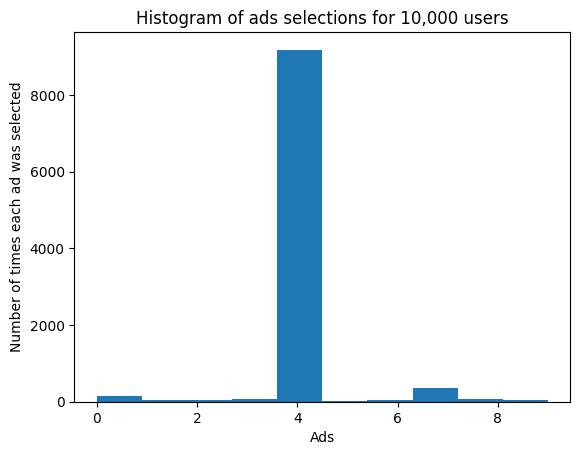

In [29]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections for 10,000 users')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

#UCB vs Thompson Sampling
#We've 10,000 rows/user data, UCB was unable to predict accurately(the best ad) for 500 users dataset , but was able to predict for 1000 users,
#despite , Thompson sampling implemented on N=10,000 then 1000 then 500 & performed way better than UCB algo , see results below .

#So ,thompson sampling is more powerful than UCB Algorithm.

# Original algo ends above - It is For 1000 and 500 no of users - to compare the result

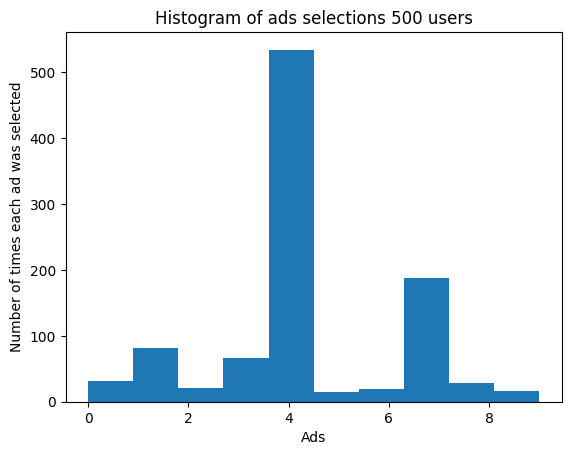

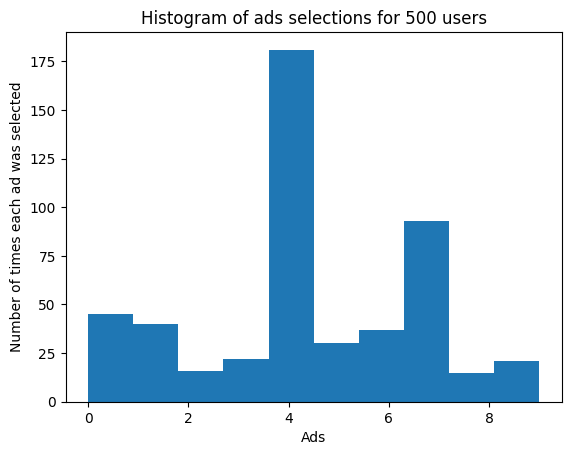

In [30]:

#_______________________FOR 1000 USERS________________________________

N = 1000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
  ad = 0
  max_random = 0
  for i in range(0, d):
    random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
    if (random_beta > max_random):
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n, ad]
  if reward == 1:
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  else:
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
  total_reward = total_reward + reward
plt.hist(ads_selected)

plt.title('Histogram of ads selections 500 users')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()


#_______________________FOR 500 USERS________________________________


N = 500
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
  ad = 0
  max_random = 0
  for i in range(0, d):
    random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
    if (random_beta > max_random):
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n, ad]
  if reward == 1:
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  else:
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
  total_reward = total_reward + reward

plt.hist(ads_selected)
plt.title('Histogram of ads selections for 500 users')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()